In [1]:
import pyfastwell as pwf

In [2]:
from pythermonomics.geothermal_economics import GeothermalEconomics

In [3]:
settingfile = 'input/npv_thermogis2024_138.yml'

In [4]:
trajectoryfile = 'input/inputsStandardDetailed.yml'

In [5]:
economics = GeothermalEconomics.from_trajectory (settingfile, trajectoryfile)

finding KOP for plane, adinclination, adlocal, inclincation, xoff, zoff  180.0/90.0 90.0/45.0 45.0/-0.0 45.0 700.0 2400.0
finding KOP for plane, adinclination, adlocal, inclincation, xoff, zoff  360.0/90.0 270.0/45.0 45.0/0.0 45.0 700.0 2400.0


In [6]:
npv, lcoe, cashflow, simdata, wells, well_results = economics.compute_economics()

In [7]:
npv

np.float64(-7150105.064720636)

In [8]:
print(f"Well cost {cashflow['wellcosts'].iloc[0]/1e6} MEUR")

Well cost 10.60913311436677 MEUR


In [28]:
fastmodel = pwf.WellFastModel(economics, k=100, khkv=3, segmentlength=50, verbose=False)

In [29]:
fastmodel.set_dP_BHP(60)

In [30]:
npv, lcoe_val, cashflow, simdata, wells, well_results, cop, power, Tsurface, DT_eff, DP_eff = fastmodel.compute_economics()

In [31]:
print(f"NPV {npv}, LCOE {lcoe_val}, COP {cop}, Power {power} MW, Treservoir {fastmodel.production_temperature} C, Tsurface {Tsurface} C, DT_eff {DT_eff} C, DP_eff {DP_eff} bar")

NPV -8140091.211081035, LCOE 11.425577566311908, COP 11.746548832401784, Power 3.730399027503236 MW, Treservoir 82.85 C, Tsurface 80.05446605071586 C, DT_eff 30.05446605071586 C, DP_eff 59.38099077133143 bar


In [34]:
fastmodel.run_coldfront(simyears=30, rockdens=2700.0, rockcap=1000.0, porosity=0.21, maxlength=20)

years_t0 0.7150629264547408


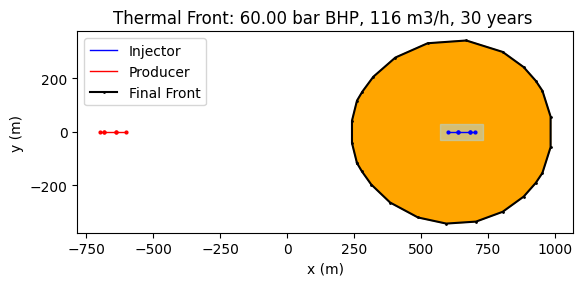

In [35]:
fastmodel.plot_coldfront()

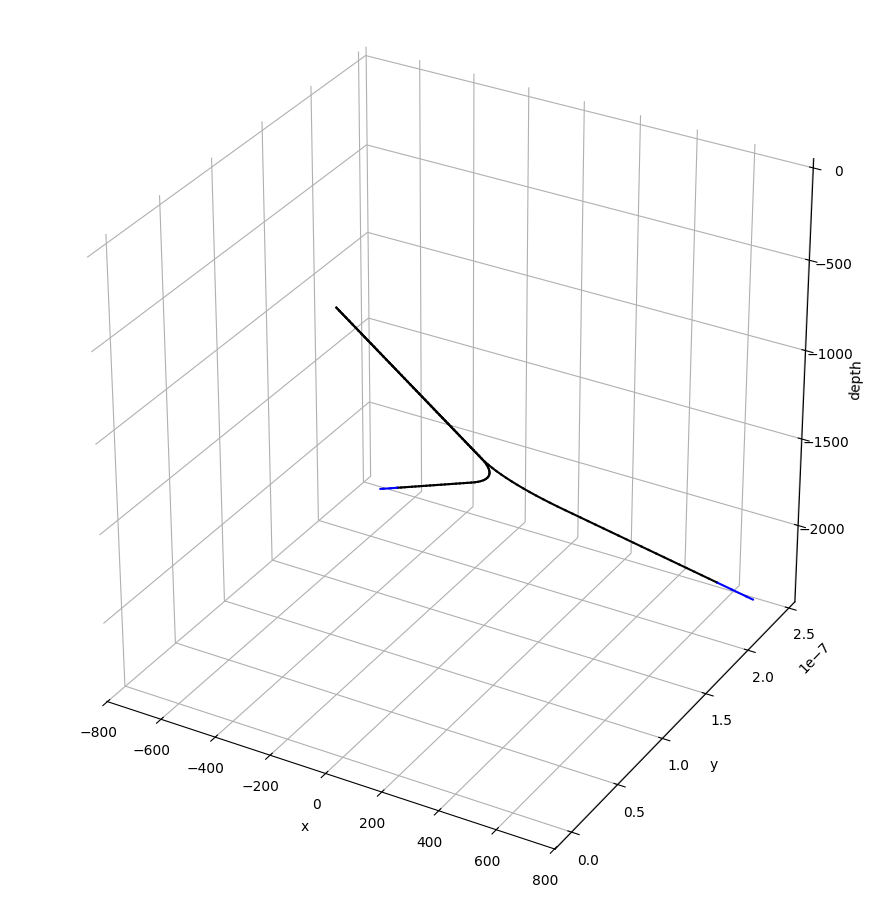

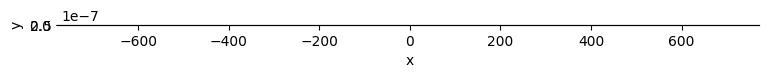

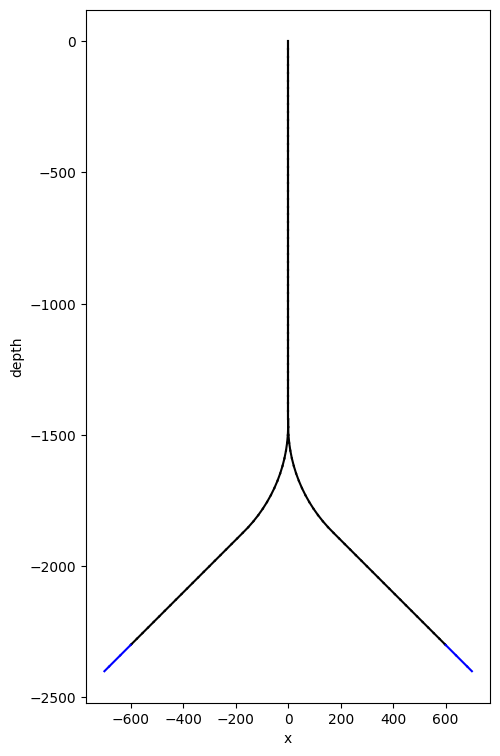

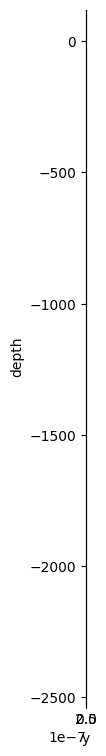

In [15]:
fastmodel.plot_trajectories()

In [16]:
L= 1300
dia_inch = 8
rw = dia_inch * 0.0254  * 0.5
skin_inj, skin_prd, ratio = fastmodel.getSkinFactors_dc1d(L, rw)
print(f"for use in DC1D with L ={L} [m]  and diameter={dia_inch} [inch] Skin factors: inj {skin_inj}, prd {skin_prd}, ratio {ratio}")

for use in DC1D with L =1300 [m]  and diameter=8 [inch] Skin factors: inj -0.9566936657524142, prd -0.9566936657505277, ratio 1.1125503736937912
